# Regression Analysis in Statsmodels - Lab

## Introduction

In the previous code along, we looked all the requirements for running an ols simple regression using statsmodels. We worked with a toy example to understand the process and all the necessary steps that must be performed. In this lab , we shall look at a slightly more complex example to study the impact of spendings in different advertising channels of total sales.

## Objectives

You will be able to:
* Set up an analytical question to be answered by regression analysis
* Study regression assumptions for real world datasets
* Visualize the results of regression analysis

## Let's get started

In this lab, we will work with the "Advertising Dataset" which is a very popular dataset for studying simple regression. [The dataset is available at Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have already downloaded for you. It is available as "Advertising.csv". We shall use this dataset to ask ourselves a simple analytical question:

## The Question

Which advertising channel has a strong relationship with sales volume, and can be used to model and predict the sales. 

### Step 1: Read the dataset and inspect its columns and 5-point statistics

In [8]:
# Load necessary libraries and import the data
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
plt.style.use('seaborn')

In [5]:
# read in data
data = pd.read_csv('Advertising.csv', index_col = 'Unnamed: 0')

In [6]:
# Check the columns and first few rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
# Get the 5-point statistics for data 
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Describe the contents of this dataset
This shows the cost per advertising medium of running an ad. Tv costs the most, followed by newspaper and radio. It also shows
the sales per record with an associated advertisting medium. Sales is the target variable and we are looking to describe sales based on how much advertising spend there is per medium.

### Step 2: Plot histograms with kde overlay to check for the normality of the predictors

C:\Users\kyleg\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


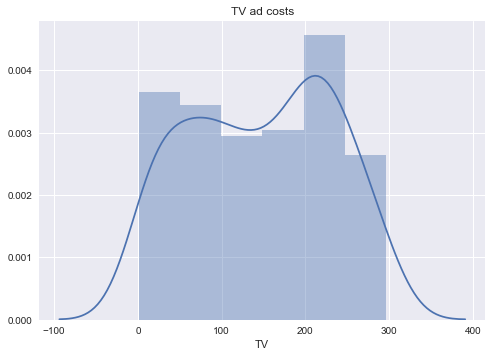

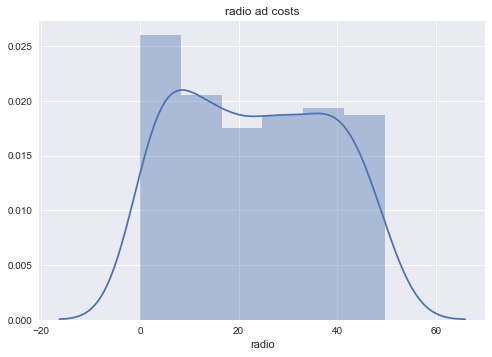

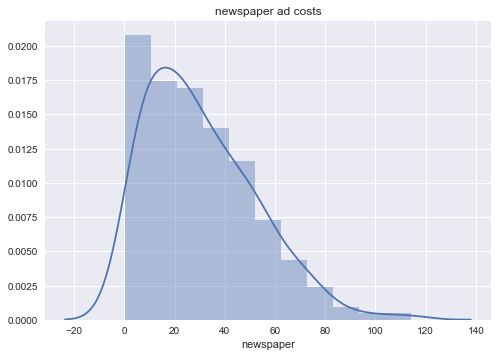

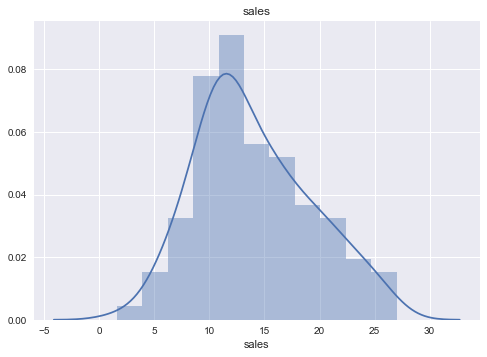

In [11]:
# For all the variables, check if they hold normality assumption
sns.distplot(data['TV'], kde=True)
plt.title('TV ad costs')
plt.show()
sns.distplot(data['radio'], kde=True)
plt.title('radio ad costs')
plt.show()
sns.distplot(data['newspaper'],kde=True)
plt.title('newspaper ad costs')
plt.show()
sns.distplot(data['sales'], kde=True)
plt.title('sales')
plt.show()

In [ ]:
# Record your observations on normality here 
#None of the dists are normal. 

#### Remember . Nothing is perfect . So be positive 
<img src="https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg" width=400>

### Step 3: Test for the linearity assumption. 
Use scatterplots to plot each predictor against the target variable

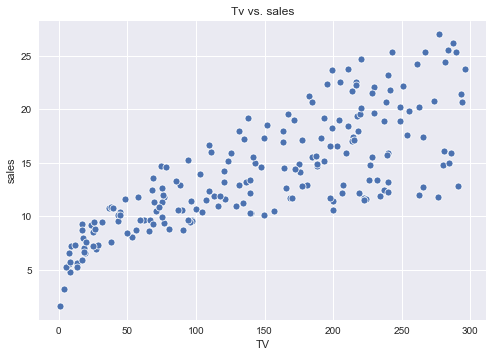

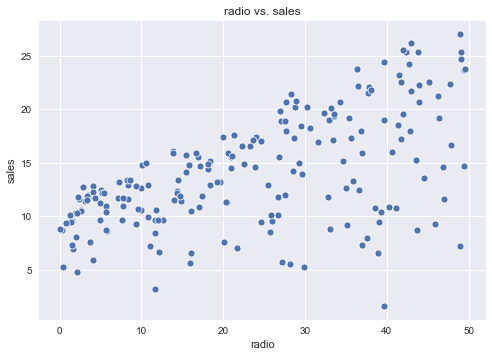

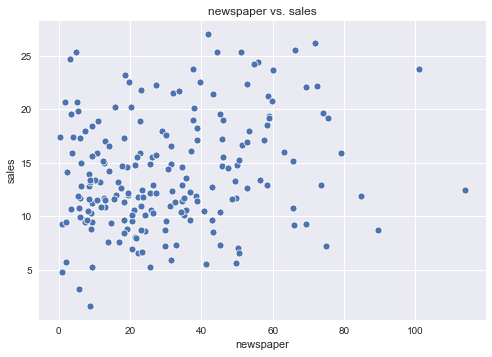

In [12]:
# visualize the relationship between the preditors and the target using scatterplots
sns.scatterplot(x=data['TV'], y = data['sales'])
plt.title('Tv vs. sales')
plt.show()
sns.scatterplot(x=data['radio'], y = data['sales'])
plt.title('radio vs. sales')
plt.show()
sns.scatterplot(x=data['newspaper'], y = data['sales'])
plt.title('newspaper vs. sales')
plt.show()


#### Record yor observations on linearity here 
Tv and sales seems to be the mostt closely related, followed by radio then newspaper. All of these violate the assumption of homoskedasticity

### Conclusion so far !

Based on above initial checks, we can confidently say that TV and radio appear to be good predictors for our regression analysis. Newspaper is very heavily skewed and also doesnt show any clear linear relationship with the target. 
> We shall move ahead with our analysis using TV and radio , and count out the newspaper due to the fact that data violates ols assumptions

Note: Kurtosis can be dealt with using techniques like log normalization to "push" the peak towards the center of distribution. We shall talk about this in the next section. 

### Step 4: Run a simple regression in `statsmodels` with TV as a predictor

In [13]:
# import libraries
# already imported
# build the formula 
#use tv as predictor
f = 'sales~TV'
# create a fitted model in one line
model = ols(formula=f, data=data).fit()

### Step 5: Get regression diagnostics summary


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           1.47e-42
Time:                        16:48:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Record your observations on "Goodness of fit"


Note here that the coefficients represent associations, not causations

SWITCH SLOPE A
ND INTERCEPT ANSWERS

Slope: for every dollar spent on TV ads, sales increase by $7
Intercept: if nothing was spent on TV ads, sales would be $0.0475
The standard deviation of the slope says that on average the increase in sales as a result of a $1 increase in TV ads can vary positively and negatively by $0.46
The t-stat and p-value say that both slope and intercept are significant
The 95% confidence interval says that we are 95% confident the slope is between 6.13 and 7.94 dollars per tc ad dollar, and the intercept is 0.042 to 0.053 dollars
The distribution as some slight skewness and kurtosis but are pretty insiginficant
The r-squared is 0.62, meaning that 62% of the variation in sales is explaing by TV ad spending

### Step 6:  Draw a prediction line with data points omn a scatter plot for X (TV) and Y (Sales)

Hint: We can use `model.predict()` functions to predict the start and end point of of regression line for the minimum and maximum values in the 'TV' variable. 

In [17]:
# create a DataFrame with the minimum and maximum values of TV
x_new = pd.DataFrame({'TV': [data['TV'].min(), data['TV'].max()]})
# make predictions for those x values and store them
predictions = model.predict(x_new)
print(predictions)



0     7.065869
1    21.122454
dtype: float64


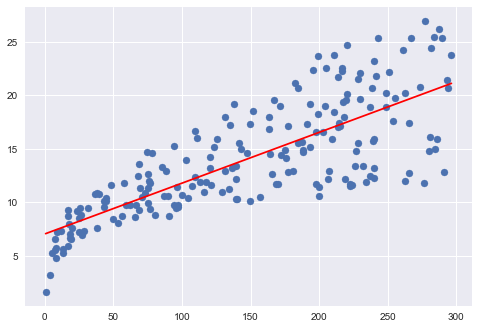

In [21]:
# first, plot the observed data and the least squares line
plt.scatter(x=data['TV'], y=data['sales'])
plt.plot(x_new, predictions, color='red')

### Step 7: Visualize the error term for variance and heteroscedasticity

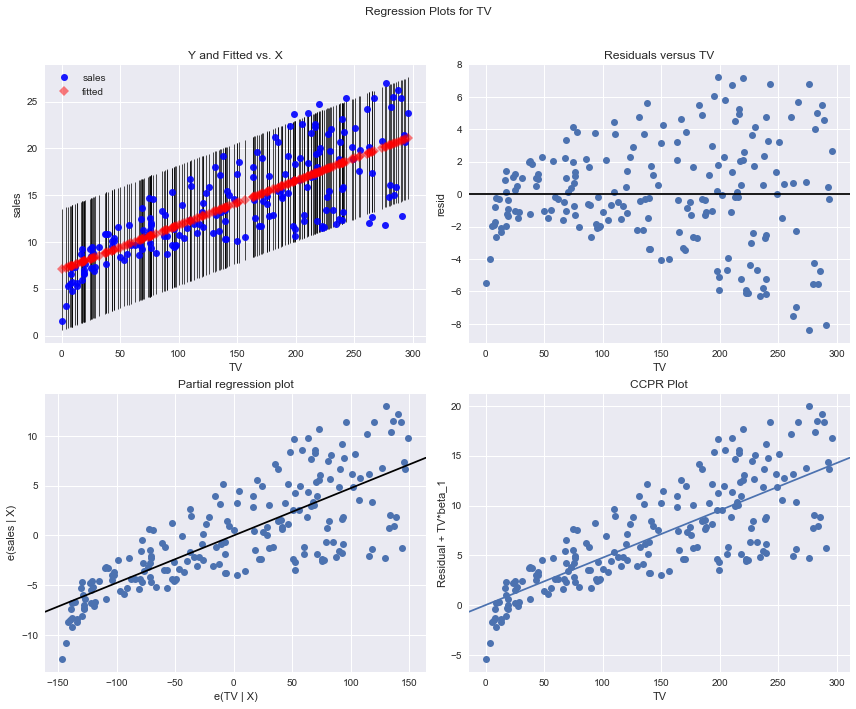

In [26]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
plt.show()

#### Record Your observations on residuals
Graph 1 shows us the 95% confidence interval imposed on the data and the fitted data. Some of the data in the top right fall outside of the 95% confidence interval. We can see the that data is positively correlated.
Graph 2 shows the distance of each raw data point from the mean of all the datapoint. This indicates goodness of fit and variance. We can see there is heteroskedasticity since there is a connical shape in the error term. Ie. there is more variation in the upper range of values than the lower range
Graph 3 is not important in this case since our model only has one variable. this graph shows the relationship between height and weight adjusting for additional variables, which we don't have
graph 4 shows how adding impact of other variables to TV would change the trendline

### Next, repeat above for radio and go through the same process, recording your observations

In [28]:
f = 'sales~radio'
model = ols(formula=f, data=data).fit()
model.summary()
#plt = plt.figure(figsize=(10,12))
#fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
#plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.35e-19
Time:                        18:05:31   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Record your observations here for goodnes of fit 
#P values are significant (less than 0.05)
#For every dollar of radio spend sales increase 20 cents. If no radio ad is spent, sales are still $9.3. The r-squared is 0.332 indicating that
#radio ad spend account for 33.2% of sales

In [36]:
fig2 = plt.figure()
fig2 = sm.graphics.plot_regress_exog(model, "radio", fig=fig2)
plt.show()

TypeError: 'NoneType' object is not callable

## The Answer


Based on above analysis, we can conclude that none of the two chosen predictors is ideal for modeling a relationship with the sales volumes. `Newspaper` clearly violated normality and linearity assumptions. TV and radio did not provide a high value for co-efficient of determination - TV performed slightly better than the radio. There is obvious heteroscdasticity in the residuals for both variables. 

> We can either look for further data, perform extra pre-processing or use more advanced techniques. 

Remember there are lot of technqiues we can employ to FIX this data. 

Whether we should call TV the "best predictor" or label all of them "equally useless", is a domain specific question and a marketing manager would have a better opinion on how to move forward with this situation. 

In the following lesson, we shall look at the more details on interpreting the regression diagnostics and confidence in the model. 

## Summary

In this lesson, we ran a complete regression analysis with a simple dataset. We looked for the regression assumptions pre and post the analysis phase. We also created some visualizations to develop a confidence on the model and check for its goodness of fit. 